In [1]:
import xgboost
import sklearn
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

# Image Loading

In [126]:
import glob
import numpy

def images_from_folder(path: str, extensions: list[str] = None, verbose: bool = False, convert_BGR_RGB: bool = True) -> list[np.array]:
    if extensions is None:
        extensions = ['png', 'jpg', 'gif']    # Add image formats here
    if path[-1] != '/':
        path += '/'
    image_paths = []
    [image_paths.extend(glob.glob(path + '*.' + e)) for e in extensions]
    files = []
    files.extend(glob.glob(path + "*"))
    images = [cv2.imread(img) for img in image_paths]
    if verbose:
        print(f"{len(images)} images loaded out of {len(files)} files from {path}")
        
    # make sure all images are loaded as 0-255 values in colour space
    images = [int(img*255) if np.max(img) < 1 else img for img in images ]  
    for img_path, img in zip(image_paths, images):
        if np.max(img) > 255:
            print(f"There was an issue with loading image {img_path}. It's pixel values could not be automatically converted to a 0-255 range")
    if convert_BGR_RGB:
        images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
    return np.array(images)

In [181]:
import random

def show_images(image_list: list[np.array], nx: int = 2, ny: int = 2, random_order: bool = False) -> None:
    plt.figure(figsize=(10,10))
    if random_order:
        image_list = [img for img in image_list] # ok I have no idea why I need to do this but without this
        # line for some bizarre reason images get duplicated...
        random.shuffle(image_list) 
        
    for i in range(min(nx*ny, len(image_list))):
        plt.subplot(ny,nx,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image_list[i], cmap=plt.cm.binary)
        # plt.xlabel(y[i])
    plt.show()


In [182]:
a = [1,2,3,4,5]
random.shuffle(a)
a

[5, 4, 2, 3, 1]

6 images loaded out of 6 files from /Users/felixquinque/Documents/Programming/Work_Code/ocelot/test_images/


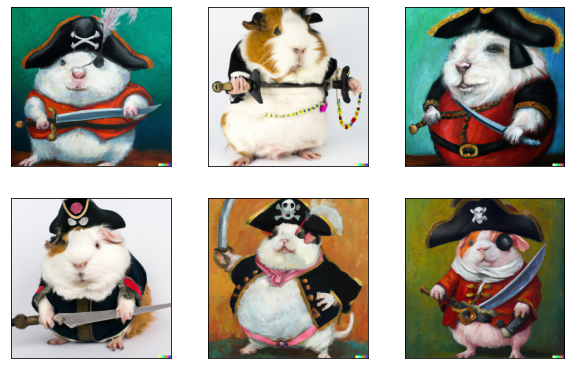

In [183]:
images = images_from_folder("/Users/felixquinque/Documents/Programming/Work_Code/ocelot/test_images", verbose=True)
show_images(images, 3,3, random_order=True)

In [120]:
images

array([], dtype=float64)

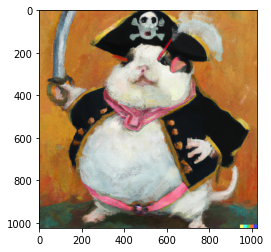

In [65]:
plt.imshow(images[1])

# Classification

In [229]:
mnist = load_digits()
X = mnist['data']
y = mnist["target"]
X_train, X_test, y_train, y_test  = train_test_split(X,y)

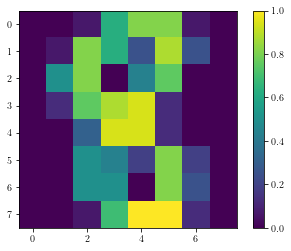

In [230]:

# Normalize
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)

# same visualisation as before

plt.figure()
plt.imshow(X_train[0].reshape(8,8))
plt.colorbar()
plt.grid(False)
plt.show()
# print(train_images[0])

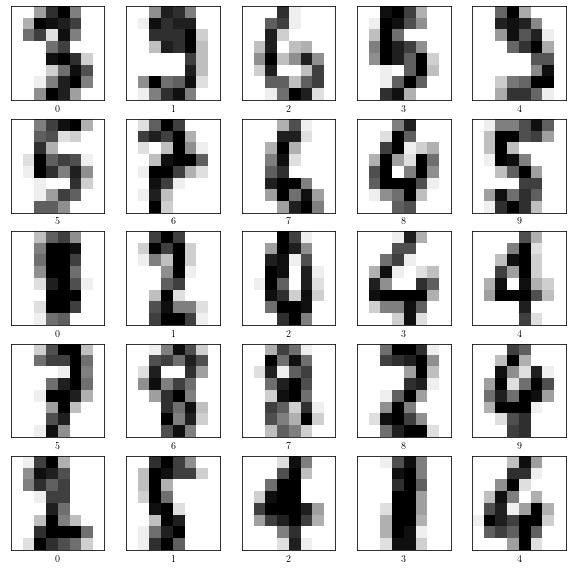

In [214]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(8,8), cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()



In [215]:
xgbc = xgboost.XGBClassifier()
xgbc2 = xgboost.XGBClassifier(n_estimators=10, min_child_weight=1)
xgbc3 = xgboost.XGBClassifier(n_estimators=500, alpha=0.1)

In [216]:
xgbc.fit(X_train,y_train, verbose=0)
xgbc2.fit(X_train,y_train, verbose=0)
xgbc3.fit(X_train,y_train, verbose=0)

/Users/felixquinque/opt/anaconda3/envs/main_env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:24:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=10,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0.100000001, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [217]:
# preds = xgbc.predict(X_test)
predict_probs = xgbc.predict_proba(X_test)
predict_probs2 = xgbc2.predict_proba(X_test)
predict_probs3 = xgbc3.predict_proba(X_test)